In [1]:
import numpy as np  
import math
from enum import Enum
from collections import namedtuple

# matplotlib
# ライブラリーのインポート
import matplotlib.pyplot as plt
# インライン表示
%matplotlib inline
# 日本語フォント
import pylab
from matplotlib.font_manager import FontProperties

# 家電

## 4.　テレビ

### 4.1　定義 

#### 4.1.1　機器の電源接続状態および動作状態

テレビの電源接続状態および動作状態は、以下を想定する。

* 電源接続状態：
    * 常時時、AC電源に接続される。  
* 動作状態：
    * 使用時には稼働状態のみが発生する。
    * 非使用時には待機状態となる。  

#### 4.1.2　機器の機能等

テレビが有する機能は、以下を想定する。  

* 機能：
    * テレビ：主機能である。稼働時に作動する。

想定する状態および機能に対応する添え字は以下のとおりである。なお、単機能であるため、機能に対応する添え字は省略する。  

| 電源接続状態 | 動作状態 |　機能　 |  添え字 |  
|:-----------: |:-------: |:------: |:------: |    
|  AC電源接続  |稼働      |テレビ   |ac,opg   |  
|  AC電源接続  |待機      |-　　　　|ac,sby   |     

In [2]:
class PowerSource(Enum):
    ac = 'ac' # AC電源接続

In [3]:
class AppStatus(Enum):
    opg = 'opg' # 稼働時
    sby = 'sby' # 待機時

### 4.2　消費電力量

日付$d$の時刻$t$におけるテレビのAC電源接続時の消費電力量$E_{E,Television,ac,d,t}$は、式(1)により表される。

<p style="text-indent:2em">AC電源接続時：</p>  
$$ 
\begin{equation*}
    E_{E,Television,ac,d,t} = E_{E,ac,opg,d,t} + E_{E,ac,sby,d,t}
\end{equation*}
$$


<div style="text-align: right;"> (1) </div>

ここで、  

$E_{E,Television,ac,d,t}$：日付$d$の時刻$t$におけるAC電源接続時の単位時間当たりの消費電力量[Wh]  
$E_{E,ac,opg,d,t}$：日付$d$の時刻$t$におけるAC電源接続下での稼働時の単位時間当たりの消費電力量[Wh]  
$E_{E,ac,sby,d,t}$：日付$d$の時刻$t$におけるAC電源接続下での待機時の単位時間当たりの消費電力量[Wh]  

である。

In [4]:
def EE_ac (EE_ac_opg, EE_ac_sby):
    '''AC電源接続時の消費電力量[Wh]を計算する'''
    # ee_ac：AC電源接続下での消費電力量[Wh]
    
    return EE_ac_opg + EE_ac_sby

### 4.3　稼働時および待機時の消費電力量

日付$d$の時刻$t$におけるAC電源接続下での稼働時および待機時の消費電力量は、式(2)および式(3)により計算される。

<p style="text-indent:2em">AC電源接続下での稼働時の消費電力量：</p>  
$$ 
\begin{equation*}
    E_{E,ac,opg,d,t} = P_{opg,d,t} \times dt_{ac,opg,d,t}  \div 3600
\end{equation*}
$$

<div style="text-align: right;"> (2) </div>

<p style="text-indent:2em">AC電源接続下での待機時の消費電力量：</p>  
$$ 
\begin{equation*}
    E_{E,ac,sby,d,t} = P_{sby,d,t} \times dt_{ac,sby,d,t}  \div 3600
\end{equation*}
$$

<div style="text-align: right;"> (3) </div>

ただし、式(4)を満たす。  

$$ 
\begin{equation*}
    dt_{ac,opg,d,t} +dt_{ac,sby,d,t} = dt_{calc}
\end{equation*}
$$
<div style="text-align: right;"> (4) </div>

ここで、  

$dt_{calc}$：単位時間[s]   
$dt_{ac,opg,d,t}$：日付$d$の時刻$t$におけるAC電源接続下での稼働時間の合計[s]  
$dt_{ac,sby,d,t}$：日付$d$の時刻$t$におけるAC電源接続下での待機時間の合計[s]   
$E_{E,ac,opg,d,t}$：日付$d$の時刻$t$におけるAC電源接続下での稼働時の単位時間当たりの消費電力量[Wh]   
$E_{E,ac,sby,d,t}$：日付$d$の時刻$t$におけるAC電源接続下での待機時の単位時間当たりの消費電力量[Wh]   
$P_{opg,st,d,t}$：日付$d$の時刻$t$における稼働時の消費電力[W]  
$P_{sby,st,d,t}$：日付$d$の時刻$t$における待機時の消費電力[W]  

である。

In [5]:
def EE_ac_opg (dt_ac_opg, P_opg):
    '''AC電源接続下での稼働時の消費電力量[Wh]を計算する'''
    # dt_ac_opg：稼働時間の合計[s]
    # P_opg：稼働時の消費電力[W]    
  
    return dt_ac_opg * P_opg / 3600

In [6]:
def EE_ac_sby (dt_ac_sby, P_sby):
    '''AC電源接続下での待機時の消費電力量[Wh]を計算する'''
    # dt_ac_sby：待機時間の合計[s]
    # P_sby：待機時の消費電力[W]
 
    return dt_ac_sby * P_sby / 3600

In [7]:
def check_duration (dt):
    '''合計が単位時間を超過しないか否かを確認する'''
    # dt：稼働時間の合計[s](list型)
    # dt_calc：単位時間[s]
    
    dt_calc = 3600.
    
    # 継続時間を積算する
    dt_sum = sum(dt)
    
    # エラーチェック
    if dt_calc < dt_sum:
        # 単位時間を超える場合 => エラー
        try:
            raise Exception('機器使用スケジュールに不正があります。')
        except Exception:
            raise
    else:
        pass

### 4.4　稼働時および待機時の消費電力

日付$d$の時刻$t$における稼働時および待機時の消費電力は、式(5)および式(6)により計算される。

<p style="text-indent:2em">稼働時の消費電力：</p>  
$$ 
\begin{equation*}
    P_{opg,d,t} = 0.8579 \times P_{rtd,opg} 
\end{equation*}
$$

<div style="text-align: right;"> (5) </div>

<p style="text-indent:2em">待機時の消費電力：</p>  
$$ 
\begin{equation*}
    P_{sby,d,t} = P_{rtd,sby} 
\end{equation*}
$$

<div style="text-align: right;"> (6) </div>

ここで、   

$P_{opg}$：稼働時の消費電力[W]  
$P_{rtd,opg}$：定格消費電力[W]  
$P_{rtd,sby}$：待機時消費電力[W]  
$P_{sby}$：待機時の消費電力[W]  

である。

In [8]:
def P_opg (Prtd_opg):
    """稼働時の消費電力[W]を計算する""" 
    # Prtd_opg：定格消費電力[W]
    
    return 0.8579 * Prtd_opg

In [9]:
def P_sby (Prtd_sby):
    """待機時の消費電力[W]を計算する""" 
    # Prtd_sby：待機時消費電力[W]
    
    return 0.8579 * Prtd_opg

### 4.5　標準条件

#### 4.5.1　機器仕様

4人世帯の標準的な機器仕様として、下表の設定を用いることができる。

| 番号 | 定格消費電力[W] | 待機時消費電力[W] | 画面タイプ | 画面サイズ | 一般型/省エネ型の別 | 製造年度 | 備考                         |  
|:----:| :-------------: | :---------------: | :--------: | :--------: | :-----------------: | :------: | :--------------------------: |  
|  00  | 125             | 0.15              | 液晶       | 37V        | 一般型              | 2011年度 | 4人標準世帯（居間）の既定値  |  
|  01  |  72             | 不明                 | 液晶       | 37V        | 省エネ型            | 2011年度 | -                            |  
|  02  | 172             | 0.15              | 液晶       | 60V        | 省エネ型            | 2011年度 | -                            |    
|  03  | 133             | 0.1               | 液晶       | 46V        | 省エネ型            | 2011年度 | -                            |    
|  04  | 193             | 0.1               | 液晶       | 37V        | 省エネ型            | 2011年度 | -                            |    
|  05  |  53             | 0.1               | 液晶       | 32V        | 省エネ型            | 2011年度 | -                            |    
|  06  |  63             | 0.367             | 液晶       | 26V        | 一般型              | 2011年度 | 4人標準世帯（洋室1）の既定値 |    

In [10]:
Spec  = {
    'TV00' : {
        'Prtd_opg' : 125,
        'Prtd_sby' : 0.15
    }, 
    'TV01' : {
        'Prtd_opg' : 72,
        'Prtd_sby' : 0
    },
    'TV02' : {
        'Prtd_opg' : 172,
        'Prtd_sby' : 0.15
    },
    'TV03' : {
        'Prtd_opg' : 133,
        'Prtd_sby' : 0.1
    },
    'TV04' : {
        'Prtd_opg' : 193,
        'Prtd_sby' : 0.1
    },
    'TV05' : {
        'Prtd_opg' : 63,
        'Prtd_sby' : 0.1
    },
    'TV06' : {
        'Prtd_opg' : 53,
        'Prtd_sby' : 0.367
    }
}

#### 4.5.2　機器使用スケジュール

4人世帯の標準的なスケジュールとして、下表の設定を用いることができる。

| 番号 | スケジュール名称    | 備考 |
|:---: | :-----------------: | :--: |
|  00  | 4人標準世帯（居間） | -    |
|  01  | 4人標準世帯（洋室1）| -    |

<p style="text-indent:2em">居間：</p>  

<p style="text-indent:4em">平日：</p>  

|時刻                  |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                 | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|AC稼働時間[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0| 60| 60| 60|  0|  0| 60|  0|  0|  0|  0| 60| 60| 60| 60| 60| 30|  0|  
|AC待機時間[\* 60 s]   | 60| 60| 60| 60| 60| 60| 60|  0|  0|  0| 60| 60|  0| 60| 60| 60| 60|  0|  0|  0|  0|  0| 30| 60| 

<p style="text-indent:4em">休日在宅：</p>  

|時刻                  |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                 | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|AC稼働時間[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0|  0| 60| 60| 60| 60|  0|  0|  0|  0| 45|  0| 60|  0|  0|  0|  0| 60|  
|AC待機時間[\* 60 s]   | 60| 60| 60| 60| 60| 60| 60| 60|  0|  0|  0|  0| 60| 60| 60| 60| 15| 60|  0| 60| 60| 60| 60|  0| 

<p style="text-indent:4em">休日外出：</p>  

|時刻                  |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                 | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|AC稼働時間[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0| 60| 60|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 60| 60|  0|  0|  
|AC待機時間[\* 60 s]   | 60| 60| 60| 60| 60| 60| 60|  0|  0| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60|  0|  0| 60| 60| 

<p style="text-indent:2em">洋室1：</p>  

<p style="text-indent:4em">平日：</p>  

|時刻                  |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                 | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|AC稼働時間[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 60|  0|  0|  0|  0|  0|  
|AC待機時間[\* 60 s]   | 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60|  0| 60| 60| 60| 60| 60| 

<p style="text-indent:4em">休日在宅：</p>  

|時刻                  |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                 | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|AC稼働時間[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 60| 60| 60|  0|  0|  0|  0|  0|  
|AC待機時間[\* 60 s]   | 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60|  0|  0|  0| 60| 60| 60| 60| 60| 

<p style="text-indent:4em">休日外出：</p>  

|時刻                  |0  |1  |2  |3  |4  |5  |6  |7  |8  |9  |10 |11 |12 |13 |14 |15 |16 |17 |18 |19 |20 |21 |22 |23 |  
|:---:                 | -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:| -:|  
|AC稼働時間[\* 60 s]   |  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0| 60| 45|  0|  0|  
|AC待機時間[\* 60 s]   | 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60| 60|  0| 15| 60| 60| 

In [11]:
class TimeUseType(Enum):
    weekdays = 'Weekdays'       # 平日
    holidays_st = 'Holidays_st' # 休日在宅
    holidays_go = 'Holidays_go' # 休日外出

In [12]:
class RoomType(Enum):
    LivingRoom = 'LivingRoom' # 居間
    ChildRoom1 = 'ChildRoom1' # 洋室1

In [13]:
Schedule= {
    'LivingRoom' : {
        'Weekdays' : {
            'opg' : [0]   *7 + [3600]*3 + [0]   *2 + [3600]*1 + [0]   *4 + [3600]*5 + [1800]*1 + [0]   *1,
            'sby' : [3600]*7 + [0]   *3 + [3600]*2 + [0]   *1 + [3600]*4 + [0]   *5 + [1800]*1 + [3600]*1
        },
        'Holidays_st' : {
            'opg' : [0]   *8 + [3600]*5 + [0]   *3 + [2700]*1 + [3600]*6 + [0]   *1,
            'sby' : [3600]*8 + [0]   *5 + [3600]*3 + [900] *1 + [0]   *6 + [3600]*1
        },
        'Holidays_go' : {
            'opg' : [0]   *7 + [3600]*2 + [0]   *11 + [3600]*2 + [0]   *2,
            'sby' : [3600]*7 + [0]   *2 + [3600]*11 + [0]   *2 + [3600]*2
        }
    },
     'ChildRoom1' : {
        'Weekdays' : {
            'opg' :  [0]   *18 + [3600]*1 + [0]   *5,
            'sby' :  [3600]*18 + [0]   *1 + [3600]*5
        },
        'Holidays_st' : {
            'opg' : [0]   *16 + [3600]*3 + [0]   *5,
            'sby' : [3600]*16 + [0]   *3 + [3600]*5
        },
        'Holidays_go' : {
            'opg' : [0]   *20 + [3600]*1 + [2700]*1 + [0]   *2,
            'sby' : [3600]*20 + [0]   *1 + [900] *1 + [3600]*2
        }
    }
}

In [14]:
def plot_hourly_bar_chart(fig_title, y_value_set, y_value_set_name_p, y_value_set_name_s, category_label, 
                          y_label, y_lower, y_upper, y_interval, y_convert_unit):
    '''横軸が時刻（1時間間隔、0～23時間）の棒グラフを作成する'''
    # fig_title：図のタイトル
    # y_value_set：y軸の値
    # y_value_set_name_p：y軸の値のデータセット名（主）
    # y_value_set_name_s：y軸の値のデータセット名（副）
    # category_label：カテゴリーのラベル
    # y_label：y軸のラベル
    # y_lower：y軸の表示の下限
    # y_ upper：y軸の表示の上限
    # y_ interval：y軸の目盛間隔
    # y_convert_unit：y軸の単位換算係数

    # 日本語フォント
    fp = FontProperties(fname='C:\WINDOWS\Fonts\msgothic.ttc', size = 12)
    
    # 既存スタイルの使用
    plt.style.use('seaborn-whitegrid')

    # サブプロットの作成
    plt.figure(figsize=(4*len(y_value_set_name_s), 3*len(y_value_set_name_p)), dpi=80)
    
    # サブプロットのタイトル
    plt.suptitle(fig_title, fontdict={'fontproperties':fp}, fontsize=14)

    for iploth in range(0, len(y_value_set_name_p)):
        for iplotw in range(0, len(y_value_set_name_s)):
            # サブプロットの指定
            ax = plt.subplot2grid((len(y_value_set_name_p), len(y_value_set_name_s)), (iploth, iplotw))
            
            # 棒グラフの作成
            for istatus in range(0, len(category_label)):
                # y軸の値のデータセット名（主）
                _y_value_set_name_p = list(y_value_set_name_p)[iploth]
                # y軸の値のデータセット名（副）
                _y_value_set_name_s = list(y_value_set_name_s)[iplotw]
                # カテゴリーのラベル
                _category_label = list(category_label)[istatus]
                
                # x軸の値
                x_value = np.array([k for k in range(24)])
                # y軸の値（項目ごと）
                y_value = np.array(y_value_set[_y_value_set_name_p][_y_value_set_name_s][_category_label])* y_convert_unit
                
                if len(y_value) > 0:
                    if istatus == 0:
                        ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=category_label[_category_label])
                        y_bottom = y_value
                    else:
                        ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=category_label[_category_label], bottom=y_bottom)
                
            # グラフのタイトル
            ax.set_title(y_value_set_name_p[_y_value_set_name_p] +'(' + y_value_set_name_s[_y_value_set_name_s] + ')' , fontdict={'fontproperties':fp})

            # x軸
            # タイトル
            ax.set_xlabel(u'時刻', fontdict={'fontproperties':fp})
            # 目盛りの位置／ラベル／形式
            # 主目盛
            ax.set_xticks(np.arange(0, 25, 3), minor=False)
            ax.set_xticklabels(np.array([k*3 for k in range(8)]+[0]).astype('str'), minor=False, visible=True)
            ax.tick_params(axis='x', which ='major', direction='in', length=3)
            # 補助目盛
            ax.set_xticks(np.arange(0, 25, 1), minor=True)
            ax.set_xticklabels(np.array([k for k in range(24)]+[0]).astype('str'), minor=True, visible=False)
            ax.tick_params(axis='x', which ='minor', direction='in', length=3)
            # 表示の上限・下限
            ax.set_xbound(lower=0, upper=24)

            # y軸
            #タイトル
            ax.set_ylabel(y_label, fontdict={'fontproperties':fp}) 
            # 目盛りの位置／形式
            ax.set_yticks(np.arange(y_lower, y_upper+y_interval, y_interval))
            ax.tick_params(axis='y', which ='major', direction='in', length=3)
            # 表示の上限・下限
            ax.set_ybound(lower=y_lower, upper=y_upper)

            # グラフの枠
            ax.spines['right'].set_color('black')
            ax.spines['left'].set_color('black')
            ax.spines['bottom'].set_color('black')
            ax.spines['top'].set_color('black')

            # 主目盛りのグリッド
            ax.grid(which='major', color='lightgray', alpha=0.7, linestyle='-')

        # 凡例
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True,  prop=fp)
    

    # グラフの重なりを解消
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
            
    plt.show()

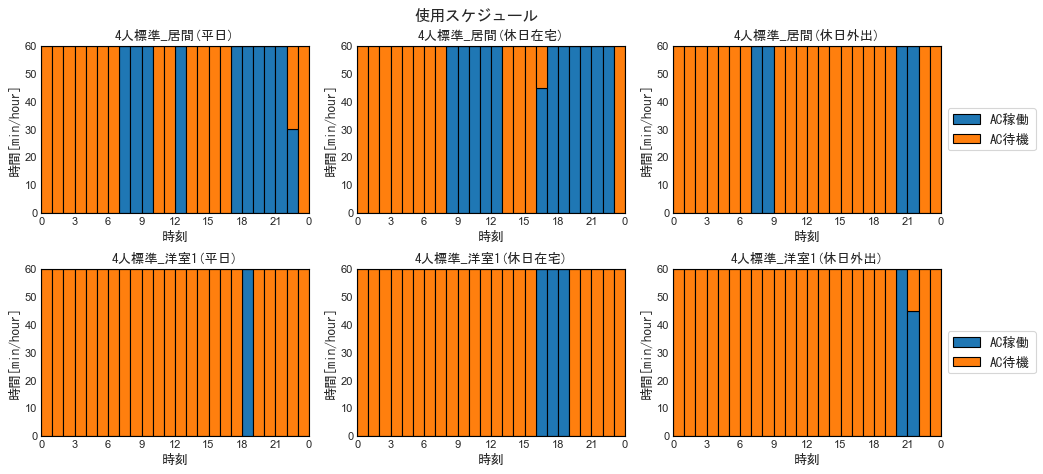

In [15]:
# 機器使用スケジュールの確認
plot_hourly_bar_chart('使用スケジュール', 
                      Schedule, 
                      {'LivingRoom':'4人標準_居間', 'ChildRoom1':'4人標準_洋室1'}, 
                      {'Weekdays':'平日', 'Holidays_st':'休日在宅', 'Holidays_go':'休日外出'}, 
                      {'opg':'AC稼働', 'sby':'AC待機'}, 
                      '時間[min/hour]', 0, 60, 10, 1/60)

### 付録1：サンプルコード

4人標準世帯の標準条件について、サンプルコードを示す。

In [16]:
def get_spec(app_type):
    '''機器仕様を取得する'''
    # app_type：機器タイプ
    
    # 機器仕様の取得
    try:
        spec = Spec[app_type]
    except:
        raise Exception('機器タイプの入力に不正があります。')     
    
    Prtd_opg = spec['Prtd_opg']
    Prtd_sby = spec['Prtd_sby']
    
    return Prtd_opg, Prtd_sby

In [17]:
def get_dt(time_use_type, time_of_day, schedule_name):
    '''機器使用スケジュールを取得する'''
    # time_use_type：['Weekdays', 'Holidays_st', 'Holidays_go']
    # time_of_day：時刻（0-23）
    # schedule_name：スケジュール名
     
    # スケジュールの取得
    try:
        schedule_set = Schedule[schedule_name][time_use_type]
    except:
        raise Exception('スケジュール名の入力に不正があります。')    
               
    # 動作状態のタイプ
    app_status_types = list(schedule_set)
    
    # 動作状態ごとの継続時間[s]の取得
    for i, app_status_type in enumerate(app_status_types):
        if app_status_type == 'opg':
            dt_ac_opg = schedule_set[app_status_type][time_of_day]
        elif app_status_type == 'sby':
            dt_ac_sby = schedule_set[app_status_type][time_of_day]
        else:
            raise Exception
            
    # 時間超過の確認
    check_duration([dt_ac_opg, dt_ac_sby]) 
    
    return dt_ac_opg, dt_ac_sbydef get_dt(room_type, time_use_type, time_of_day):
    '''機器使用スケジュールを取得する'''
    # room_type：室タイプ['LivingRoom', 'ChildRoom1' ]
    # time_use_type：生活時間タイプ[Weekdays'、'Holidays_st'、'Holidays_go']
    # time_of_day：時刻[0～23]
     
    # スケジュールの取得
    try:
        schedule = Schedule[room_type][time_use_type]
    except:
        raise

   # 時間超過の確認
    dt = []
    for istatus in range(0,len(schedule)):
        dt = dt + [schedule[list(schedule)[istatus]][time_of_day]]
    
    check_duration(dt) 
    
    return dt

In [18]:
def calc_EE_ac_opg(dt, app, seat_heater_switch, theta_toilet_ave):
    '''AC電源接続下の稼働時における消費電力量[Wh]を計算する'''
    # dt：単位時間における継続時間の合計[s](PowerSource型(AppStatus型))
    # app：機器の仕様[-](AppSpec型)
    # seat_heater_switch：便座ヒータの電源スイッチ[オフ、オン] 
    # theta_toilet_ave：トイレ空気温度の日平均値[C]
    
    # AC電源接続時の単位時間における継続時間の合計[s]
    dt_ac_opg = dt.ac.opg
       
    # AC電源接続時の消費電力[W]
    p_ac_opg = P_opg(app.Prtd_opg_st, app.Prtd_opg_wt, app.seat_heater_type, app.water_heater_type, seat_heater_switch, theta_toilet_ave)
    
    # AC電源接続時の消費電力量[Wh]
    ee_ac_opg = EE_ac_opg([dt_ac_opg], [p_ac_opg])
    
    return ee_ac_opg